## Loading data and preliminary analysis

In [24]:
import re
import random
import pandas as pd
import numpy as np
import json

In [ ]:
# df = pd.read_json(r'intents.json')
# tags=[]
# questions=[]
# responses=[]
# for intent in df['intents']:
#     for rows in intent['patterns']:
#         tags.append(intent['tag'])
#         questions.append(rows)
#     for rows in intent['responses']:
#         responses.append(rows)
# data=pd.DataFrame({"Questions":questions, "Answers": responses})
# data

In [26]:
data=pd.read_csv("/content/big_data.csv")
data.drop(['Unnamed: 0'], axis=1)
data.rename(columns = {'questions':'Questions', 'responses':'Answers'}, inplace = True)

In [27]:
data.head(20)

,Unnamed: 0,Questions,Answers
0,0,Hi,Hello there. Tell me how are you feeling today?
1,1,Hey,Hi there. What brings you here today?
2,2,Is anyone there?,Hi there. How are you feeling today?
3,3,Hi there,Great to see you. How do you feel currently?
4,4,Hello,Hello there. Glad to see you're back. What's g...
5,5,Hey there,Hello there. Tell me how are you feeling today?
6,6,Howdy,Hi there. What brings you here today?
7,7,Hola,Hi there. How are you feeling today?
8,8,Bonjour,Great to see you. How do you feel currently?
9,9,Konnichiwa,Hi there. How are you feeling today?


In [28]:
# data preprocessing 

for i in range(data.shape[0]):
  data['Answers'][i]=re.sub(r'\n', ' ',data['Answers'][i])
  data['Answers'][i]=re.sub('\(', '',data['Answers'][i]) 
  data['Answers'][i]=re.sub(r'\)', '',data['Answers'][i]) 
  data['Answers'][i]=re.sub(r',', '',data['Answers'][i]) 
  data['Answers'][i]=re.sub(r'-', '',data['Answers'][i])
  data['Answers'][i]=re.sub(r'/', '',data['Answers'][i])  
  data['Answers'][i]=re.sub(r'/', '',data['Answers'][i])

<ipython-input-28-758dfefa0631>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Answers'][i]=re.sub(r'\n', ' ',data['Answers'][i])
<ipython-input-28-758dfefa0631>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Answers'][i]=re.sub('\(', '',data['Answers'][i])
<ipython-input-28-758dfefa0631>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Answers'][i]=re.sub(r'\)', '',data['Answers'][i])
<ipython-input-28-758dfefa06

In [29]:
pairs=[]

for i in range(data.shape[0]):
  pairs.append(((data['Questions'][i]),data['Answers'][i]))

In [30]:
pairs

[('Hi', 'Hello there. Tell me how are you feeling today?'),
 ('Hey', 'Hi there. What brings you here today?'),
 ('Is anyone there?', 'Hi there. How are you feeling today?'),
 ('Hi there', 'Great to see you. How do you feel currently?'),
 ('Hello',
  "Hello there. Glad to see you're back. What's going on in your world right now?"),
 ('Hey there', 'Hello there. Tell me how are you feeling today?'),
 ('Howdy', 'Hi there. What brings you here today?'),
 ('Hola', 'Hi there. How are you feeling today?'),
 ('Bonjour', 'Great to see you. How do you feel currently?'),
 ('Konnichiwa', 'Hi there. How are you feeling today?'),
 ('Guten tag', 'Great to see you. How do you feel currently?'),
 ('Ola',
  "Hello there. Glad to see you're back. What's going on in your world right now?"),
 ('Good morning',
  "Good morning. I hope you had a good night's sleep. How are you feeling today? "),
 ('Good afternoon', 'Good afternoon. How is your day going?'),
 ('Good evening', 'Good evening. How has your day bee

## Data preprocessing 

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import string

input_docs = []
target_docs = []

for line in pairs:

  input_doc, target_doc = line[0], line[1]

  # remove URLs
  input_doc = re.sub(r'http\S+', '', input_doc)
  target_doc = re.sub(r'http\S+', '', target_doc)

  # convert to lowercase
  input_doc = input_doc.lower()
  target_doc = target_doc.lower()

  # remove punctuation
  input_doc = input_doc.translate(str.maketrans("", "", string.punctuation))
  target_doc = target_doc.translate(str.maketrans("", "", string.punctuation))

  # Appending each input sentence to input_docs
  input_docs.append(input_doc)

  # Redefine target_doc below and append it to target_docs
  target_doc = '<START> ' + target_doc + ' <END>'

  target_docs.append(target_doc)

In [32]:
input_docs

['hi',
 'hey',
 'is anyone there',
 'hi there',
 'hello',
 'hey there',
 'howdy',
 'hola',
 'bonjour',
 'konnichiwa',
 'guten tag',
 'ola',
 'good morning',
 'good afternoon',
 'good evening',
 'good night',
 'bye',
 'see you later',
 'goodbye',
 'au revoir',
 'sayonara',
 'ok bye',
 'bye then',
 'fare thee well',
 'thanks',
 'thank you',
 'thats helpful',
 'thanks for the help',
 'than you very much',
 'nothing much',
 'who are you',
 'what are you',
 'who you are',
 'tell me more about yourself',
 'what is your name',
 'what should i call you',
 'whats your name',
 'tell me about yourself',
 'what can you do',
 'who created you',
 'how were you made',
 'how were you created',
 'my name is ',
 'i am name',
 'i go by ',
 'could you help me',
 'give me a hand please',
 'can you help',
 'what can you do for me',
 'i need support',
 'i need help',
 'support me please',
 'i am feeling lonely',
 'i am so lonely',
 'i feel down',
 'i feel sad',
 'i am sad',
 'i feel so lonely',
 'i feel empt

In [33]:
target_docs

['<START> hello there tell me how are you feeling today <END>',
 '<START> hi there what brings you here today <END>',
 '<START> hi there how are you feeling today <END>',
 '<START> great to see you how do you feel currently <END>',
 '<START> hello there glad to see youre back whats going on in your world right now <END>',
 '<START> hello there tell me how are you feeling today <END>',
 '<START> hi there what brings you here today <END>',
 '<START> hi there how are you feeling today <END>',
 '<START> great to see you how do you feel currently <END>',
 '<START> hi there how are you feeling today <END>',
 '<START> great to see you how do you feel currently <END>',
 '<START> hello there glad to see youre back whats going on in your world right now <END>',
 '<START> good morning i hope you had a good nights sleep how are you feeling today  <END>',
 '<START> good afternoon how is your day going <END>',
 '<START> good evening how has your day been <END>',
 '<START> good night sweet dreams <EN

In [34]:
# Define the tokenizers
input_tokenizer = Tokenizer(filters='')
input_tokenizer.fit_on_texts(input_docs)

target_tokenizer = Tokenizer(filters='')
target_tokenizer.fit_on_texts(target_docs)


In [35]:
input_vocab = input_tokenizer.word_index
target_vocab = target_tokenizer.word_index
reverse_input_features_dict = dict((i, token) for token, i in input_vocab.items())
reverse_target_features_dict = dict((i, token) for token, i in target_vocab.items())

In [36]:
print(target_vocab)

{'you': 1, 'to': 2, '<start>': 3, '<end>': 4, 'the': 5, 'and': 6, 'a': 7, 'your': 8, 'that': 9, 'is': 10, 'of': 11, 'in': 12, 'are': 13, 'i': 14, 'it': 15, 'be': 16, 'with': 17, 'for': 18, 'this': 19, 'what': 20, 'have': 21, 'can': 22, 'or': 23, 'if': 24, 'not': 25, 'about': 26, 'on': 27, 'do': 28, 'as': 29, 'will': 30, 'they': 31, 'may': 32, 'feel': 33, 'like': 34, 'he': 35, 'how': 36, 'but': 37, 'there': 38, 'so': 39, 'would': 40, 'we': 41, 'more': 42, 'help': 43, 'yourself': 44, 'from': 45, 'time': 46, 'when': 47, 'who': 48, 'some': 49, 'its': 50, 'know': 51, 'out': 52, 'relationship': 53, 'people': 54, 'at': 55, 'dont': 56, 'want': 57, 'then': 58, 'one': 59, 'her': 60, 'him': 61, 'good': 62, 'way': 63, 'an': 64, 'other': 65, 'get': 66, 'no': 67, 'all': 68, 'them': 69, 'she': 70, 'life': 71, 'by': 72, 'need': 73, 'me': 74, 'youre': 75, 'being': 76, 'think': 77, 'make': 78, 'my': 79, 'someone': 80, 'their': 81, 'feeling': 82, 'was': 83, 'has': 84, 'his': 85, 'these': 86, 'see': 87, '

## Encoder - Decoder model

In [37]:
# Define the maximum sequence lengths and vocabulary sizes
max_encoder_seq_length = max([len(text.split()) for text in input_docs])
max_decoder_seq_length = max([len(text.split()) for text in target_docs])
encoder_vocab_size = len(input_tokenizer.word_index) + 1
decoder_vocab_size = len(target_tokenizer.word_index) + 1

In [38]:
decoder_vocab_size

12114

In [39]:
# Split the data into training and validation sets
input_train, input_val, target_train, target_val = train_test_split(input_docs, target_docs, test_size=0.2, random_state=42)

In [40]:
# Convert the input and output sequences to integer sequences
encoder_train = input_tokenizer.texts_to_sequences(input_train)
encoder_val = input_tokenizer.texts_to_sequences(input_val)
decoder_train = target_tokenizer.texts_to_sequences(target_train)
decoder_val = target_tokenizer.texts_to_sequences(target_val)

# Pad the integer sequences to the same length
encoder_train = pad_sequences(encoder_train, maxlen=max_encoder_seq_length, padding='post')
encoder_val = pad_sequences(encoder_val, maxlen=max_encoder_seq_length, padding='post')
decoder_train = pad_sequences(decoder_train, maxlen=max_decoder_seq_length, padding='post')
decoder_val = pad_sequences(decoder_val, maxlen=max_decoder_seq_length, padding='post')

In [41]:
encoder_train

array([[ 109,    4, 2012, ...,    0,    0,    0],
       [  35,   98,   14, ...,    0,    0,    0],
       [  65,  106,   33, ...,    0,    0,    0],
       ...,
       [  81,  171,   18, ...,    0,    0,    0],
       [   5,  660,   14, ...,    0,    0,    0],
       [   6,  174,    3, ...,    0,    0,    0]], dtype=int32)

## Training

In [42]:
# Define the encoder and decoder models
embedding_dim = 256
latent_dim = 512

encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(encoder_vocab_size, embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)
encoder_states = [state_h, state_c]

decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(decoder_vocab_size, embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)
decoder_dense = Dense(decoder_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

In [43]:
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compile the model
training_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
training_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 256)    1283072     ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, None, 256)    3101184     ['input_4[0][0]']                
                                                                                            

In [46]:
training_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
# Compile the model
training_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history1 = training_model.fit([encoder_train, decoder_train[:,:-1]], decoder_train[:,1:], 
          validation_data=([encoder_val, decoder_val[:,:-1]], decoder_val[:,1:]), 
          batch_size=32, epochs=10)

Epoch 1/10
121/121 [==============================] - 116s 916ms/step - loss: 0.2882 - accuracy: 0.9615 - val_loss: 0.2712 - val_accuracy: 0.9606
Epoch 2/10
121/121 [==============================] - 102s 844ms/step - loss: 0.2517 - accuracy: 0.9625 - val_loss: 0.2648 - val_accuracy: 0.9610
Epoch 3/10
121/121 [==============================] - 97s 802ms/step - loss: 0.2428 - accuracy: 0.9630 - val_loss: 0.2587 - val_accuracy: 0.9616
Epoch 4/10
121/121 [==============================] - 96s 797ms/step - loss: 0.2344 - accuracy: 0.9637 - val_loss: 0.2519 - val_accuracy: 0.9624
Epoch 5/10
121/121 [==============================] - 93s 767ms/step - loss: 0.2247 - accuracy: 0.9645 - val_loss: 0.2455 - val_accuracy: 0.9632
Epoch 6/10
121/121 [==============================] - 92s 760ms/step - loss: 0.2161 - accuracy: 0.9652 - val_loss: 0.2414 - val_accuracy: 0.9635
Epoch 7/10
121/121 [==============================] - 90s 746ms/step - loss: 0.2088 - accuracy: 0.9657 - val_loss: 0.2387 - val_

In [47]:
training_model.save('my_model.h5')

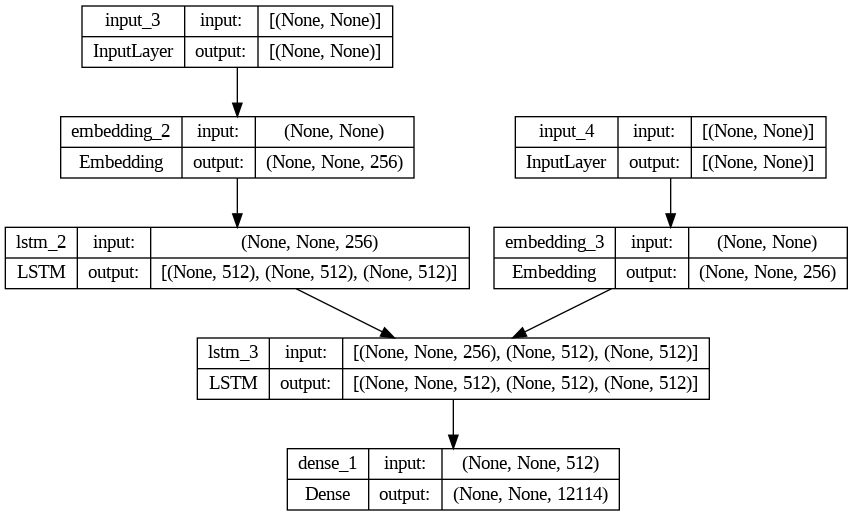

In [48]:
from keras.utils.vis_utils import plot_model
plot_model(training_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)   # plot model

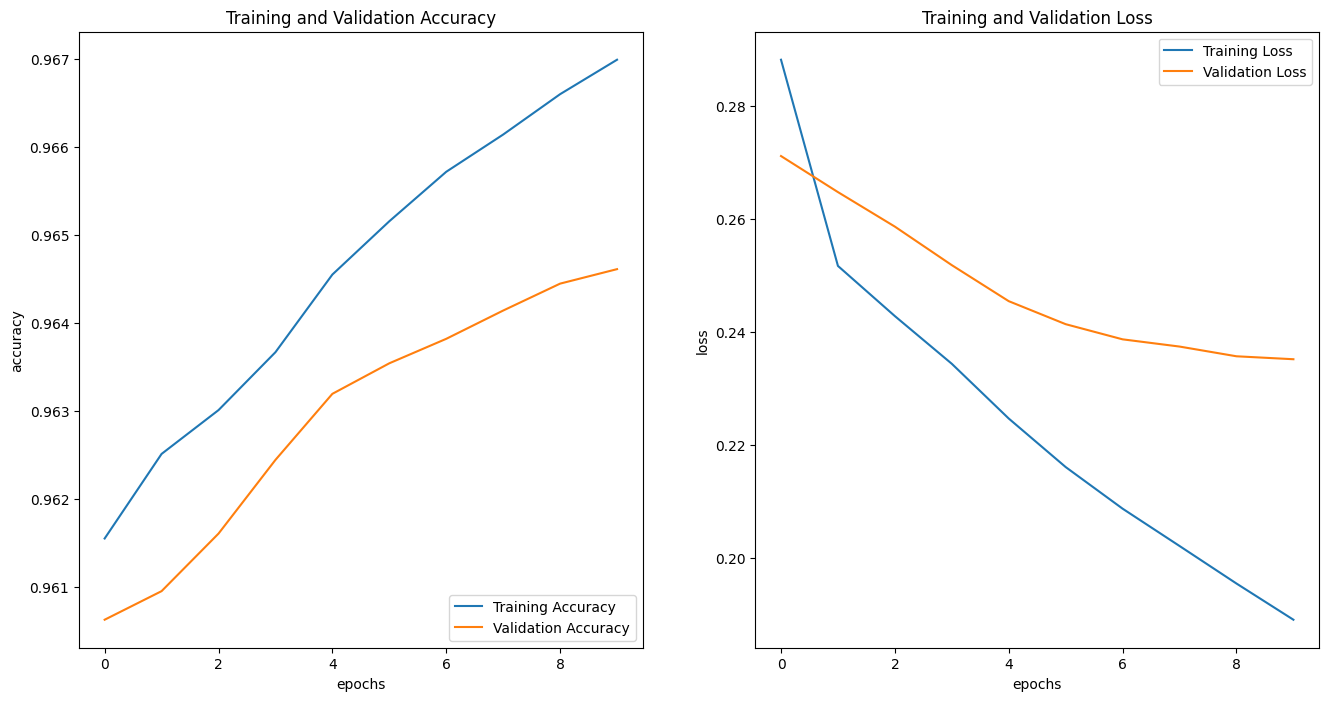

In [49]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Predictions

In [50]:
from keras.models import load_model
training_model = load_model('my_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[4].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

In [51]:
latent_dim = 512
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]

In [52]:
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_embedding, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)

In [53]:
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

In [54]:
from keras.models import load_model
training_model = load_model('my_model.h5')
encoder_inputs = training_model.input[0]
encoder_outputs, state_h_enc, state_c_enc = training_model.layers[4].output
encoder_states = [state_h_enc, state_c_enc]
encoder_model = Model(encoder_inputs, encoder_states)

latent_dim = 512
decoder_lstm = training_model.layers[5]
decoder_inputs = training_model.input[1]
decoder_embedding = training_model.layers[3](decoder_inputs)
decoder_dense = training_model.layers[6]
decoder_state_input_hidden = Input(shape=(latent_dim,))
decoder_state_input_cell = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_hidden, decoder_state_input_cell]
decoder_outputs, state_hidden, state_cell = decoder_lstm(decoder_embedding, initial_state=decoder_states_inputs)
decoder_states = [state_hidden, state_cell]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

def decode_response(test_input):
    #Getting the output states to pass into the decoder
    states_value = encoder_model.predict(test_input)
    #Generating empty target sequence of length 1
    target_seq = np.zeros((test_input.shape[0], decoder_vocab_size))
    
    #Setting the first token of target sequence with the start token
    target_seq[0, target_vocab['<start>']] = 1.
    
    #A variable to store our response word by word
    decoded_sentence = ''
    # print(test_input.shape)
    # print(target_seq.shape)
    # print(states_value[0].shape)
    # print(states_value[1].shape)
    
    stop_condition = False
    while not stop_condition:
          #Predicting output tokens with probabilities and states
          output_tokens, hidden_state, cell_state = decoder_model.predict([target_seq] + states_value)
          
          #Choosing the one with highest probability
          sampled_token_index = np.argmax(output_tokens[0, -1, :])
          print(output_tokens.shape)
          sampled_token = reverse_target_features_dict[sampled_token_index]
          decoded_sentence += " " + sampled_token
          
          #Stop if hit max length or found the stop token
          if (sampled_token == '<end>' or len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True
          
          #Update the target sequence
          target_seq = np.zeros((1, 1, encoder_vocab_size))
          target_seq[0, 0, sampled_token_index] = 1.
          
          #Update states
          states_value = [hidden_state, cell_state]
    return decoded_sentence

In [55]:
class ChatBot:
  negative_responses = ("no", "nope", "nah", "naw", "not a chance", "sorry")
  exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")
  
  #Method to start the conversation
  def start_chat(self):
    user_response = input("Hi, I'm a chatbot trained on random dialogs. AMA!\n")
    
    if user_response in self.negative_responses:
      print("Ok, have a great day!")
      return
    self.chat(user_response)
  
  #Method to handle the conversation
  def chat(self, reply):
    while not self.make_exit(reply):
      reply = input(self.generate_response(reply)+"\n")
    
  #Method to convert user input into a matrix
  def string_to_matrix(self, user_input):
    tokens = user_input.translate(str.maketrans("", "", string.punctuation))
    
    # Convert the input and output sequences to integer sequences
    user_matrix = input_tokenizer.texts_to_sequences(tokens)

    # Pad the integer sequences to the same length
    user_input_matrix = pad_sequences(user_matrix, maxlen=max_encoder_seq_length, padding='post')
    return user_input_matrix
  
  #Method that will create a response using seq2seq model we built
  def generate_response(self, user_input):
    input_matrix = self.string_to_matrix(user_input)
    chatbot_response = decode_response(input_matrix)
    print("Hello")
    #Remove <START> and <END> tokens from chatbot_response
    chatbot_response = chatbot_response.replace("<START>",'')
    chatbot_response = chatbot_response.replace("<END>",'')
    return chatbot_response
  
  #Method to check for exit commands
  def make_exit(self, reply):
    for exit_command in self.exit_commands:
      if exit_command in reply:
        print("Ok, have a great day!")
        return True
    return False
  
chatbot = ChatBot()

## Demo

In [56]:
chatbot.start_chat()

Hi, I'm a chatbot trained on random dialogs. AMA!
hello
1/1 [==============================] - 1s 1s/step
(5, 12114, 12114)


KeyError: ignored